In [1]:
def calculate_BILT_points(card, option, rent, charge):
    # error handlings
    if card not in ['Blue', 'Obsidian', 'Palladium']:
        raise ValueError('You have to choose card options from Blue, Obsidian, Palladium!')

    if option not in [1, 2]:
        raise ValueError('Option has to be either 1 or 2!')

    if rent < 0:
        raise ValueError('Rent has to be greater than 0!')

    if charge < 0:
        raise ValueError('Charge has to be greater than 0!')

    # point calculation
    multiplier = 1
    if card == 'Obsidian':
        multiplier = 3
    if card == 'Palladium':
        multiplier = 2

    if option == 1:
        if charge < 0.25 * rent:
            return multiplier * charge
        elif charge >= 0.25 * rent and charge < 0.5 * rent:
            return 0.5 * rent + multiplier * charge
        elif charge >= 0.5 * rent and charge < 0.75 * rent:
            return 0.75 * rent + multiplier * charge
        elif charge >= 0.75 * rent and charge < rent:
            return rent + multiplier * charge
        else:
            return 1.25 * rent + multiplier * charge
    else:
        if charge < 0.75 * rent:
            return (4/3 + multiplier) * charge
        else:
            return rent + multiplier * charge

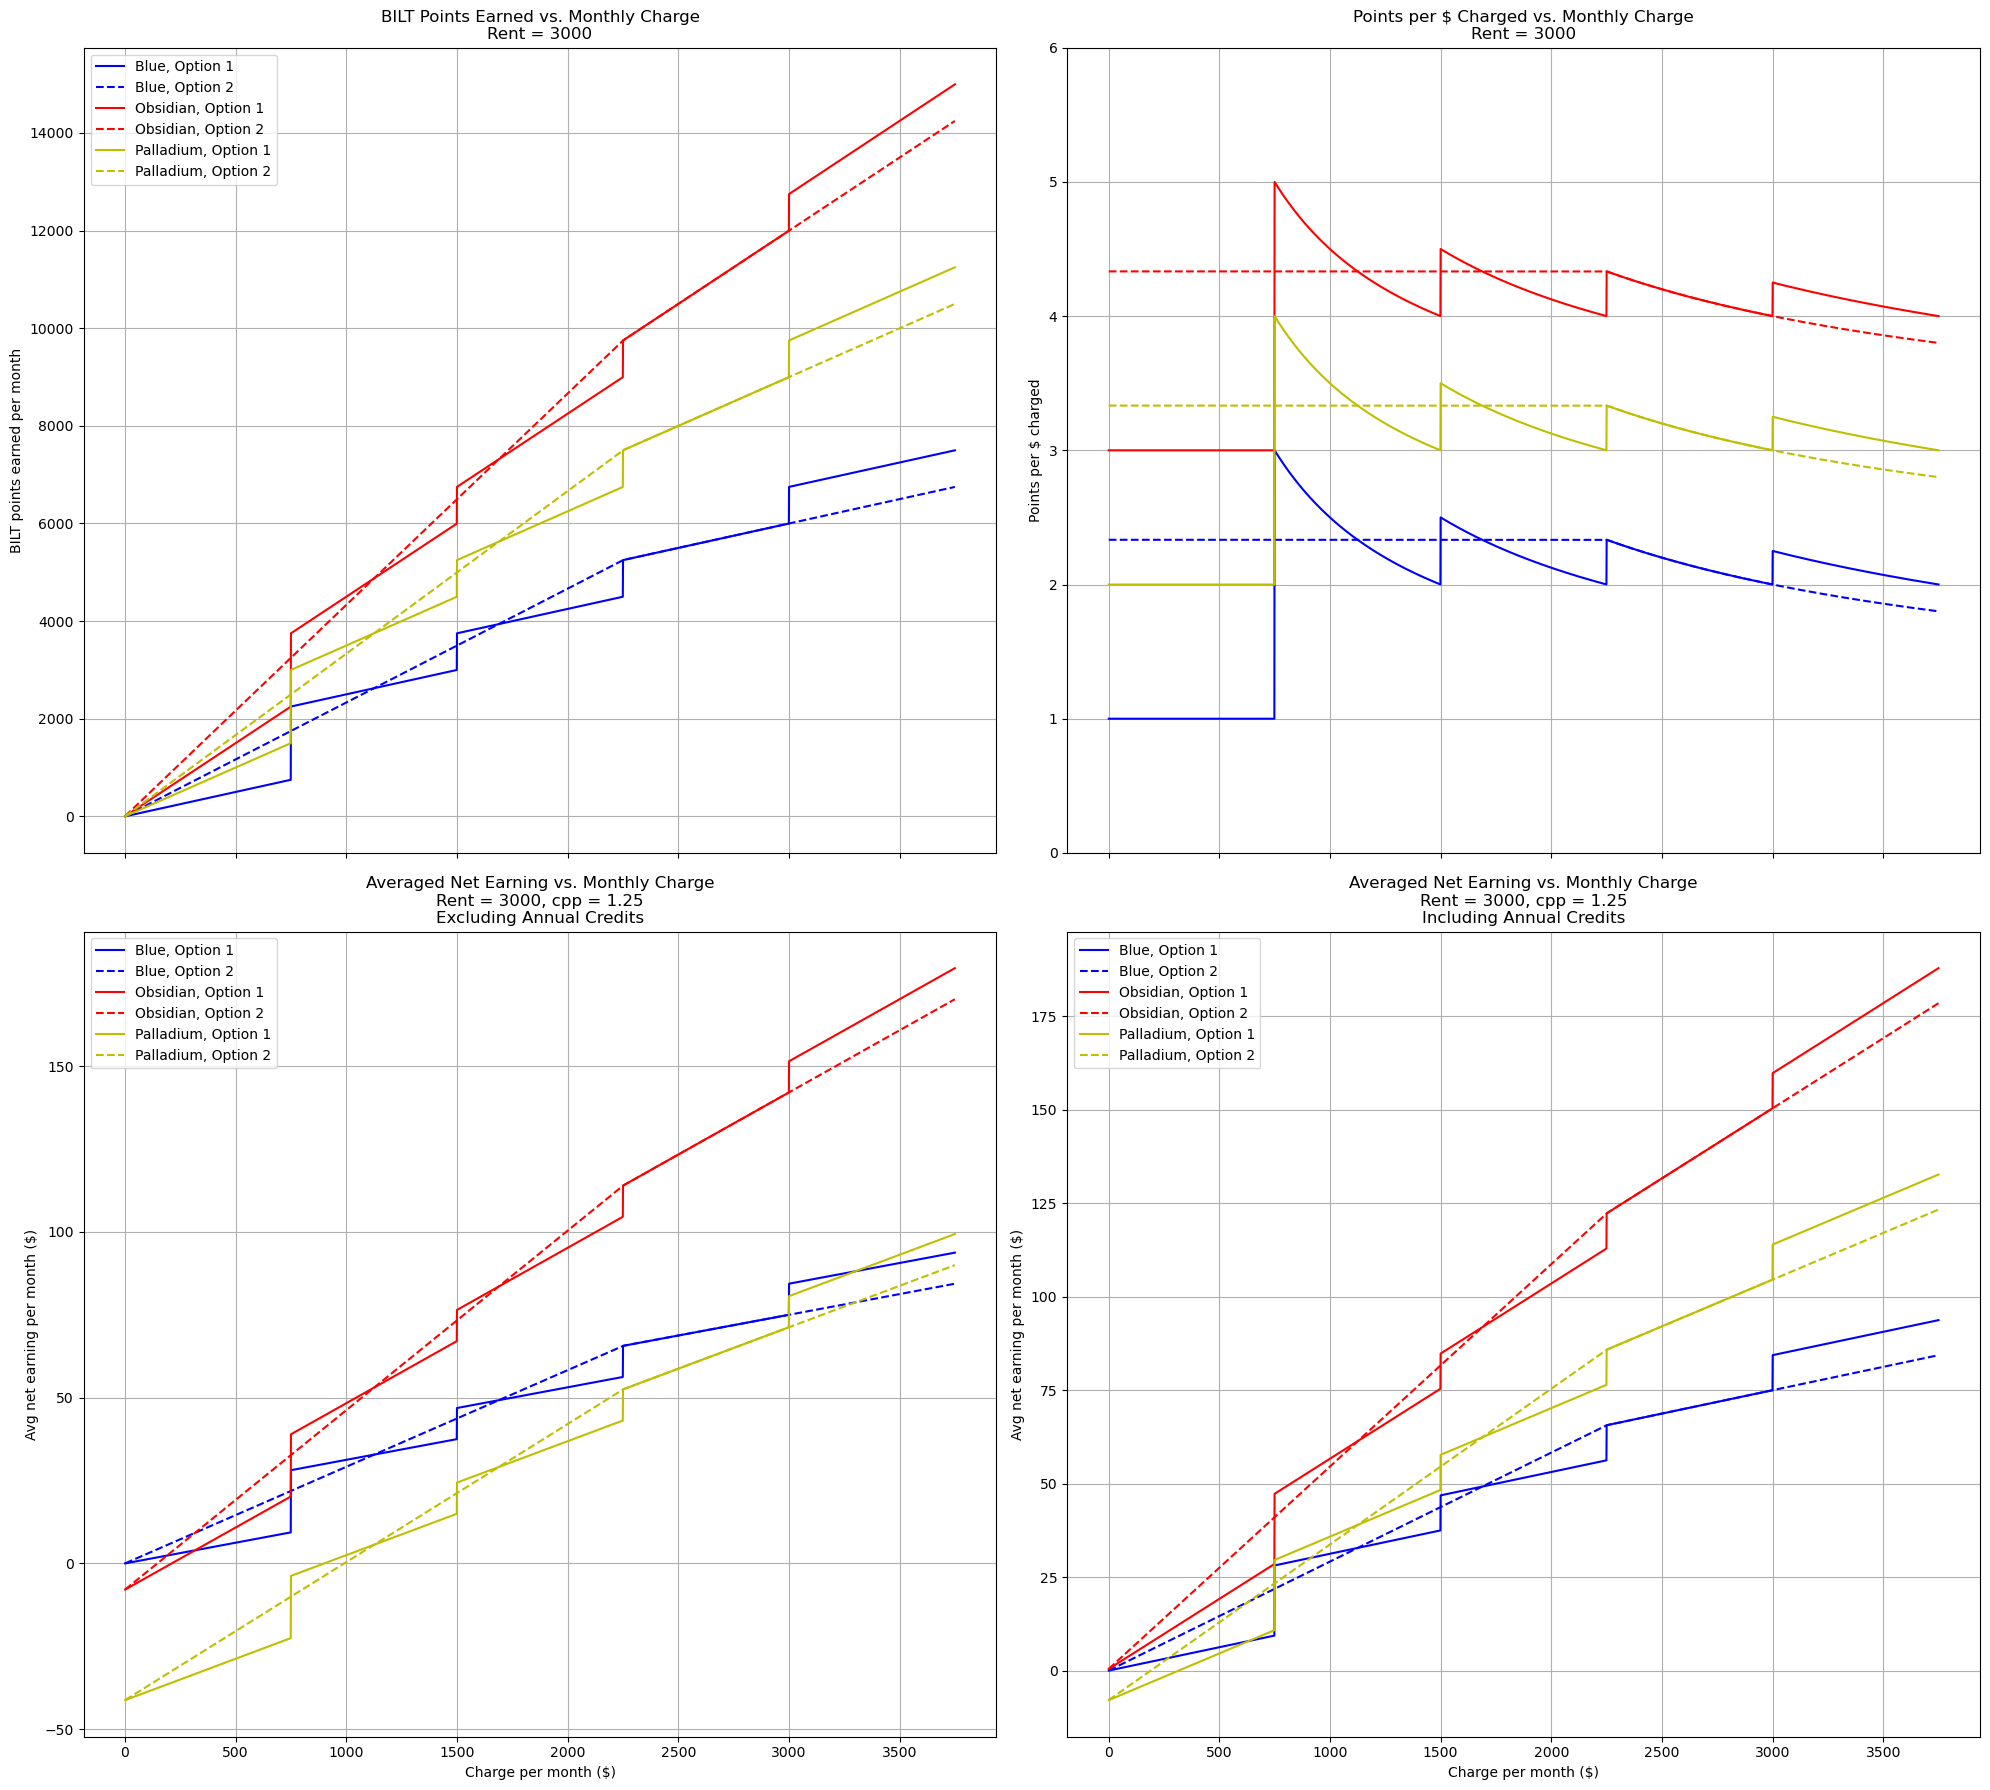

In [ ]:
import matplotlib.pyplot as plt

rent = 3000
cpp = 1.25
charge = [i for i in range(1, int(rent * 1.25))]  # avoid divide-by-zero

color_map = {'Blue': 'b', 'Obsidian': 'r', 'Palladium': 'y'}
option_map = {1: '-', 2: '--'}
annual_fee = {'Blue': 0, 'Obsidian': 95, 'Palladium': 495}
credits = {'Blue': 0, 'Obsidian': 100, 'Palladium': 400}

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20, 18))

# ===================== (0,0) Total points earned =====================
ax = axs[0, 0]
for card in color_map:
    for option in option_map:
        points = [
            calculate_BILT_points(card, option, rent, c)
            for c in charge
        ]
        ax.plot(
            charge,
            points,
            f"{color_map[card]}{option_map[option]}",
            label=f'{card}, Option {option}'
        )

ax.set_title(f'BILT Points Earned vs. Monthly Charge\nRent = {rent}')
ax.set_ylabel('BILT points earned per month')
ax.legend()
ax.grid(True)

# ===================== (0,1) Points per dollar =====================
ax = axs[0, 1]
for card in color_map:
    for option in option_map:
        points = [
            calculate_BILT_points(card, option, rent, c)
            for c in charge
        ]
        points_per_dollar = [p / c for p, c in zip(points, charge)]
        ax.plot(
            charge,
            points_per_dollar,
            f"{color_map[card]}{option_map[option]}",
            label=f'{card}, Option {option}'
        )

ax.set_title(f'Points per $ Charged vs. Monthly Charge\nRent = {rent}')
ax.set_ylabel('Points per $ charged')
ax.set_ylim(0, 6)
ax.legend()
ax.grid(True)

# ===================== (1,0) Avg net earning (excluding credits) =====================
ax = axs[1, 0]
for card in color_map:
    for option in option_map:
        values = [
            calculate_BILT_points(card, option, rent, c) * cpp / 100
            - annual_fee[card] / 12
            for c in charge
        ]
        ax.plot(
            charge,
            values,
            f"{color_map[card]}{option_map[option]}",
            label=f'{card}, Option {option}'
        )

ax.set_title(
    f'Averaged Net Earning vs. Monthly Charge\n'
    f'Rent = {rent}, cpp = {cpp}\nExcluding Annual Credits'
)
ax.set_xlabel('Charge per month ($)')
ax.set_ylabel('Avg net earning per month ($)')
ax.legend()
ax.grid(True)

# ===================== (1,1) Avg net earning (including credits) =====================
ax = axs[1, 1]
for card in color_map:
    for option in option_map:
        values = [
            calculate_BILT_points(card, option, rent, c) * cpp / 100
            - (annual_fee[card] - credits[card]) / 12
            for c in charge
        ]
        ax.plot(
            charge,
            values,
            f"{color_map[card]}{option_map[option]}",
            label=f'{card}, Option {option}'
        )

ax.set_title(
    f'Averaged Net Earning vs. Monthly Charge\n'
    f'Rent = {rent}, cpp = {cpp}\nIncluding Annual Credits'
)
ax.set_xlabel('Charge per month ($)')
ax.set_ylabel('Avg net earning per month ($)')
ax.legend()
ax.grid(True)

fig.tight_layout()
fig.canvas.draw()  # REQUIRED for correct bbox

PAD = 0.1  # inches of padding

for i, ax in enumerate(axs.flat):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer())

    # Convert from pixels to inches
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())

    # Expand bbox by PAD on all sides
    bbox.x0 -= PAD
    bbox.y0 -= PAD
    bbox.x1 += PAD
    bbox.y1 += PAD

    fig.savefig(
        f"subplot_{i+1}.png",
        bbox_inches=bbox,
        dpi=300
    )

plt.show()
